In [1]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
b

QtAwesome                          1.0.2
qtconsole                          5.0.3
QtPy                               1.9.0
regex                              2021.4.4
requests                           2.28.1
requests-oauthlib                  1.3.0
rope                               0.18.0
rsa                                4.7.2
Rtree                              0.9.7
ruamel-yaml-conda                  0.15.100
scikit-image                       0.18.1
scikit-learn                       0.24.1
scipy                              1.6.2
seaborn                            0.11.1
Send2Trash                         1.5.0
setuptools                         52.0.0.post20210125
simplegeneric                      0.8.1
singledispatch                     0.0.0
sip                                4.19.13
six                                1.15.0
sniffio                            1.2.0
snowballstemmer                    2.1.0
sortedcollections                  2.1.0
sortedcontainers             

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices("GPU")
len(gpus)

0

## remove dodgy images

In [4]:
import cv2
import imghdr
import matplotlib.pyplot as plt 

In [5]:
data_dir = "data"

In [6]:
image_extensions = ["jpg", "jpeg", "png", "bmp"]

In [7]:
os.listdir(data_dir)

['happy', 'sad']

In [8]:
os.listdir(os.path.join(data_dir, "happy"))

['05-12-21-happy-people.jpg',
 '170404-happy-workers-feature.jpg',
 '1902540.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '35438_hd.jpg',
 '613k1XcpYCL._SL1200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'getty_143919450_9706479704500104_51510.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970

In [9]:
for img_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, img_class)):
        img_path = os.path.join(data_dir, img_class, image)
        try:
            img = cv2.imread(img_path) #opens an image as a numpy array
            tip = imghdr.what(img_path)
            if tip not in image_extensions:
                print("img not in list of extensions {}".format(img_path))
                os.remove(img_path)
        except Exception as e:
            print("issue with img {}".format(img_path))         

In [12]:
tf.data.Dataset??

In [13]:
import numpy as np

In [14]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 230 files belonging to 2 classes.


In [15]:
data

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
data_itr = data.as_numpy_iterator()

In [17]:
batch = data_itr.next()

In [18]:
batch

(array([[[[3.08437500e+01, 2.68437500e+01, 2.78437500e+01],
          [3.12421875e+01, 2.69765625e+01, 2.81093750e+01],
          [3.93359375e+01, 3.16718750e+01, 3.42265625e+01],
          ...,
          [6.12814941e+01, 6.12814941e+01, 6.12814941e+01],
          [5.71970215e+01, 5.71970215e+01, 5.71970215e+01],
          [4.73625488e+01, 4.73625488e+01, 4.73625488e+01]],
 
         [[3.55312500e+01, 3.32187500e+01, 3.42187500e+01],
          [3.66613770e+01, 3.26198730e+01, 3.36406250e+01],
          [4.28366699e+01, 3.73281250e+01, 3.90390625e+01],
          ...,
          [5.60703125e+01, 5.60703125e+01, 5.60703125e+01],
          [5.30207520e+01, 5.30207520e+01, 5.30207520e+01],
          [4.44453125e+01, 4.44453125e+01, 4.44453125e+01]],
 
         [[4.33203125e+01, 4.13203125e+01, 4.23203125e+01],
          [4.30532227e+01, 3.97578125e+01, 4.07578125e+01],
          [4.78828125e+01, 4.27734375e+01, 4.43281250e+01],
          ...,
          [4.93750000e+01, 4.93750000e+01, 4.9375

In [19]:
len(batch)
# 1st: Images represented as numpy array
# 2nd: labels

2

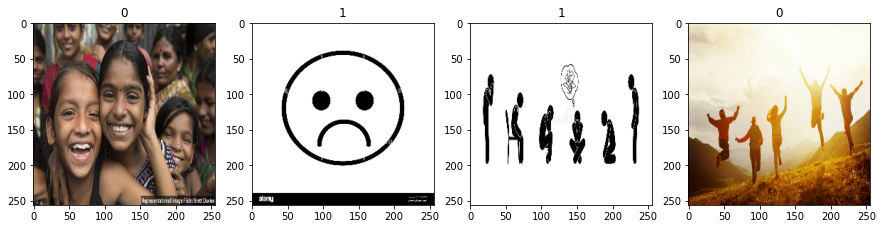

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(15, 15))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0 : Happy

1 : Sad

## data preprocessing

In [27]:
batch[0].max()

255.0

In [28]:
data = data.map(lambda x, y : (x/255, y))

In [30]:
scaled_itr = data.as_numpy_iterator()

In [31]:
batch = scaled_itr.next()

In [33]:
batch[0].min()

0.0

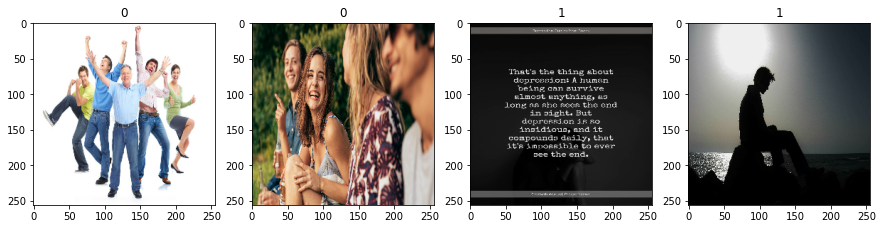

In [34]:
fig, ax = plt.subplots(ncols=4, figsize=(15, 15))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### split data

In [38]:
ln = len(data)

In [39]:
ln

8

In [42]:
train_size = int(ln * 0.7)
test_size = int(ln * 0.1) + 1
val_size = int(ln * 0.2) + 1 

In [43]:
train_size + test_size + val_size

8

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [57]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

 ## train model

In [59]:
logdir = "logs"

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

In [61]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 11s 2s/step - loss: 1.6319 - accuracy: 0.5188 - val_loss: 0.7454 - val_accuracy: 0.6406
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 0.6553 - accuracy: 0.6438 - val_loss: 0.6241 - val_accuracy: 0.7188
Epoch 3/20
5/5 [==============================] - 11s 2s/step - loss: 0.5887 - accuracy: 0.7188 - val_loss: 0.5599 - val_accuracy: 0.6250
Epoch 4/20
5/5 [==============================] - 10s 2s/step - loss: 0.5633 - accuracy: 0.7312 - val_loss: 0.4592 - val_accuracy: 0.7812
Epoch 5/20
5/5 [==============================] - 10s 2s/step - loss: 0.4632 - accuracy: 0.8000 - val_loss: 0.3753 - val_accuracy: 0.9062
Epoch 6/20
5/5 [==============================] - 10s 2s/step - loss: 0.3955 - accuracy: 0.8500 - val_loss: 0.3275 - val_accuracy: 0.9375
Epoch 7/20
5/5 [==============================] - 10s 2s/step - loss: 0.3892 - accuracy: 0.8188 - val_loss: 0.3299 - val_accuracy: 0.8438
Epoch 8/20
5/5 [===================

In [63]:
hist.history

{'loss': [1.631921410560608,
  0.6552725434303284,
  0.5886918306350708,
  0.5633352994918823,
  0.46317896246910095,
  0.39545121788978577,
  0.38918858766555786,
  0.35367825627326965,
  0.27413976192474365,
  0.20719817280769348,
  0.14834614098072052,
  0.1540733277797699,
  0.10380198806524277,
  0.06939666718244553,
  0.03842023387551308,
  0.026067525148391724,
  0.018568580970168114,
  0.013099570758640766,
  0.006543478462845087,
  0.006797776557505131],
 'accuracy': [0.518750011920929,
  0.643750011920929,
  0.71875,
  0.731249988079071,
  0.800000011920929,
  0.8500000238418579,
  0.8187500238418579,
  0.84375,
  0.8999999761581421,
  0.9312499761581421,
  0.9624999761581421,
  0.9437500238418579,
  0.981249988079071,
  0.9937499761581421,
  0.9937499761581421,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.745434582233429,
  0.6240535378456116,
  0.5599489212036133,
  0.45920810103416443,
  0.37527215480804443,
  0.3275243639945984,
  0.3298904299736023,
  0.2657028436

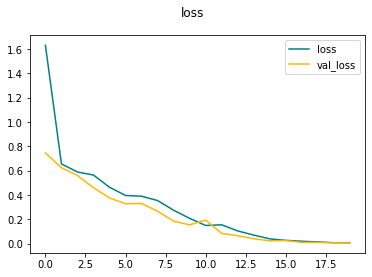

In [65]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="#ffb703", label="val_loss")
fig.suptitle("loss")
plt.legend()
plt.show()

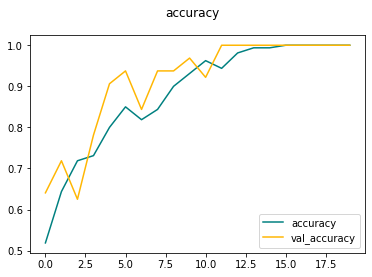

In [66]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="#ffb703", label="val_accuracy")
fig.suptitle("accuracy")
plt.legend()
plt.show()

# performance evaluation

In [67]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [73]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [71]:
len(test)

1

In [74]:
for batch in test.as_numpy_iterator():
    X, y = batch
    ypred = model.predict(X)
    pre.update_state(y, ypred)
    rec.update_state(y, ypred)
    acc.update_state(y, ypred)

In [77]:
print("precision : ", pre.result().numpy())
print("recall : ", rec.result().numpy())
print("accuracy : ", acc.result().numpy())

precision :  1.0
recall :  1.0
accuracy :  1.0


## testing

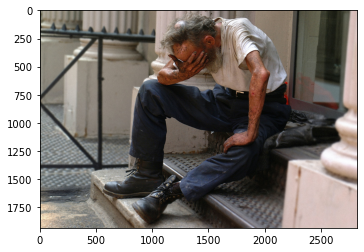

In [102]:
img = cv2.imread("sadtest.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

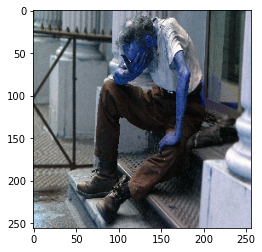

In [103]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [104]:
resize.shape

TensorShape([256, 256, 3])

In [105]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [106]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

array([[0.9917431]], dtype=float32)

# save the model

In [107]:
from tensorflow.keras.models import load_model

In [108]:
model.save(os.path.join("model", "emotionIdentify.h5"))

In [109]:
path = os.path.join("model", "emotionIdentify.h5")
path

'model\\emotionIdentify.h5'

In [110]:
newModel = load_model(path)

In [111]:
newModel.predict(np.expand_dims(resize/255, 0))

array([[0.9917431]], dtype=float32)